In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [7]:
cd '/content/drive/My Drive/Colab Notebooks/kaggle/kaggle_digit_recognizer'

/content/drive/My Drive/Colab Notebooks/kaggle/kaggle_digit_recognizer


In [0]:
df = pd.read_csv('train.csv')

In [9]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
pic = list(df.iloc[3][df.columns[1:]])

In [0]:
pic = np.reshape(pic, (28,28))

In [12]:
pic.max()

255

In [13]:
pic.min()

0

In [0]:
pic = pic/255

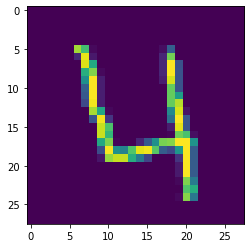

In [15]:
plt.imshow(pic)

In [0]:
x  = []
y  = []

In [17]:
len(df)

42000

In [0]:
feature = list(df.columns[1:])
label = df.columns[0]

In [0]:
#plt.imshow(np.reshape(list(df.iloc[10][feature]), (28,28))) 

In [20]:
with tf.device('/device:GPU:0'):
  for i in range(len(df)):
      if i %1000 ==0: 
          print(i)
      curr = df.iloc[i]
      dp = list(curr[feature])
      shape = (28,28,1)
      x.append(np.reshape(dp,shape))
      y.append(curr[label])   
      

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000


In [0]:
# plt.imshow(x[0])

In [0]:
# y

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=37)

In [55]:
len(X_train)

28140

In [0]:
def bin_arr(arr, limit): #to make each cell either 0 or 1
  for i in range(len(arr)): 
    for r in range(len(arr[i])):
      for c in range(len(arr[i][0])):
        if arr[i][r][c] >= limit:
          arr[i][r][c] =1
        else:
          arr[i][r][c] =0
  return arr
    

In [0]:
limit = 0.4

In [0]:
X_train = bin_arr(X_train, limit)
X_test = bin_arr(X_test, limit)

In [62]:
len(X_test)

13860

In [0]:
X_train = np.reshape(X_train, (28140,28,28,1) )

In [64]:
len(X_test)

13860

In [0]:
X_test = np.reshape(X_test, (13860,28,28,1) )

In [0]:
y_train = np.reshape(y_train, (-1, 1))

In [67]:
y_train.shape

(28140, 1)

In [0]:
y_test = np.reshape(y_test, (-1,1))

In [69]:
y_train.min()

0

In [70]:
y_test.min()

0

In [0]:
y_cat_train = to_categorical(y_train, 10)

In [0]:
y_cat_test = to_categorical(y_test, 10)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [0]:
model = Sequential()
model.add(Conv2D(filters = 128, kernel_size = (3,3),strides = 1, padding = 'valid', input_shape = (28,28,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),strides = 1, padding = 'valid', input_shape = (28,28,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),strides = 1, padding = 'valid', input_shape = (28,28,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

# model.add(Conv2D(filters = 16, kernel_size = (3,3),strides = 1, padding = 'valid', input_shape = (28,28,1), activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (2,2)))

# model.add(Conv2D(filters = 8, kernel_size = (3,3),strides = 1, padding = 'valid', input_shape = (28,28,1), activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))

model.add(Dense(10, activation = 'softmax'))

model.compile(loss ='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'] )



In [79]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 64)        73792     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 3, 3, 32)          18464     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)               

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
es = EarlyStopping(monitor = 'val_loss', patience = 2)

In [83]:
with tf.device('/device:GPU:0'):
  model.fit(x = X_train, y = y_cat_train, epochs = 100 , validation_data=(X_test, y_cat_test)) #, callbacks = [es])

Epoch 1/100
880/880 [==============================] - 5s 5ms/step - loss: 0.0119 - accuracy: 0.9961 - val_loss: 0.1274 - val_accuracy: 0.9781
Epoch 2/100
880/880 [==============================] - 5s 5ms/step - loss: 0.0089 - accuracy: 0.9970 - val_loss: 0.1389 - val_accuracy: 0.9768
Epoch 3/100
880/880 [==============================] - 5s 5ms/step - loss: 0.0125 - accuracy: 0.9957 - val_loss: 0.1347 - val_accuracy: 0.9776
Epoch 4/100
880/880 [==============================] - 5s 5ms/step - loss: 0.0093 - accuracy: 0.9969 - val_loss: 0.1617 - val_accuracy: 0.9738
Epoch 5/100
880/880 [==============================] - 5s 5ms/step - loss: 0.0103 - accuracy: 0.9967 - val_loss: 0.1321 - val_accuracy: 0.9755
Epoch 6/100
880/880 [==============================] - 5s 5ms/step - loss: 0.0119 - accuracy: 0.9964 - val_loss: 0.1346 - val_accuracy: 0.9773
Epoch 7/100
880/880 [==============================] - 5s 5ms/step - loss: 0.0073 - accuracy: 0.9977 - val_loss: 0.1236 - val_accuracy: 0.9790

In [0]:
from tensorflow.keras.models import load_model

In [0]:
model.save('digit_recognizer.h5')

In [0]:
metrics = pd.DataFrame(model.history.history)

In [87]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

In [88]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.011932,0.996091,0.127358,0.978139
1,0.008874,0.996979,0.138921,0.976768
2,0.012509,0.995665,0.134684,0.977561
3,0.009334,0.996944,0.161660,0.973810
4,0.010329,0.996731,0.132079,0.975469
...,...,...,...,...
95,0.000000,1.000000,0.288590,0.982251
96,0.000000,1.000000,0.289373,0.982251
97,0.000000,1.000000,0.290033,0.982251
98,0.000000,1.000000,0.290718,0.982251


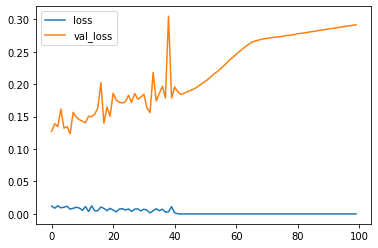

In [89]:
metrics[['loss', 'val_loss']].plot()

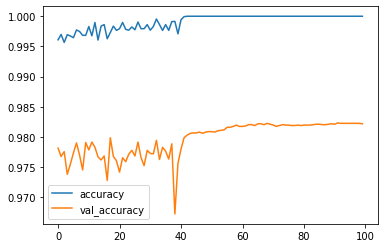

In [90]:
metrics[['accuracy', 'val_accuracy']].plot()

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [92]:
predicts = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [93]:
print(classification_report(predicts, y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1384
           1       0.99      0.99      0.99      1559
           2       0.98      0.97      0.98      1418
           3       0.97      0.99      0.98      1382
           4       0.98      0.99      0.98      1348
           5       0.98      0.98      0.98      1256
           6       0.99      0.99      0.99      1349
           7       0.99      0.98      0.98      1435
           8       0.97      0.98      0.98      1344
           9       0.97      0.97      0.97      1385

    accuracy                           0.98     13860
   macro avg       0.98      0.98      0.98     13860
weighted avg       0.98      0.98      0.98     13860



In [94]:
confusion_matrix(predicts, y_test)

array([[1366,    0,    1,    0,    1,    1,    3,    1,    3,    8],
       [   1, 1548,    0,    0,    2,    1,    2,    1,    2,    2],
       [   3,    5, 1377,   12,    2,    2,    0,   13,    4,    0],
       [   0,    1,    3, 1366,    0,    7,    0,    2,    1,    2],
       [   1,    2,    1,    0, 1328,    0,    1,    2,    7,    6],
       [   1,    0,    1,    8,    0, 1235,    3,    0,    4,    4],
       [   1,    0,    0,    0,    4,    7, 1331,    0,    5,    1],
       [   0,    4,   15,    6,    5,    0,    0, 1400,    1,    4],
       [   1,    0,    4,    5,    2,    5,    4,    0, 1314,    9],
       [   2,    1,    3,    8,   11,    1,    0,    2,    9, 1348]])

In [0]:
df = pd.read_csv('test.csv')

In [0]:
def bin_arr_line(arr, limit): #to make each cell either 0 or 1
  for i in range(len(arr)):
    if arr[i] >= limit:
      arr[i] =1
    else:
      arr[i] =0
  return arr
    

9

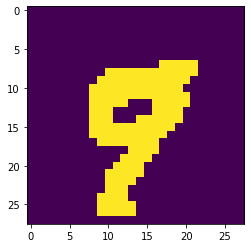

In [119]:
curr = df.iloc[1228]
x = bin_arr_line(list(curr[feature]), 0.4)
plt.imshow(np.reshape(x, (28,28)))
x = np.reshape(x, shape)
model.predict_classes(x)[0]


In [0]:
f = open ('result.csv','w')

In [121]:
!pwd
# gpu_info = !nvidia-smi
# gpu_info = '\n'.join(gpu_info)
# if gpu_info.find('failed') >= 0:
#   print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
#   print('and then re-execute this cell.')
# else:
#   print(gpu_info)

/content/drive/My Drive/Colab Notebooks/kaggle/kaggle_digit_recognizer


In [123]:
f = open ('result.csv','w')
with tf.device('/device:GPU:0'):
  feature = list(df.columns) 
  shape = (1,28,28,1)
  for i in range(len(df)):
      curr = df.iloc[i]
      if i % 1000 ==0: print(i)
      x = bin_arr_line(list(curr[feature]), limit)
      x = np.reshape(x, shape)
      f.write(str(i+1)+','+str(model.predict_classes(x)[0]))
      f.write('\n')


0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000


In [0]:
f.close()

In [0]:
pwd

'/content/drive/My Drive/Colab Notebooks/kaggle/kaggle_digit_recognizer'

In [0]:
ls -al

total 126217
-rw------- 1 root root   113466 May 13 04:02 digit_recognizer_20200512_2258.ipynb
-rw------- 1 root root  1237760 May 13 03:18 digit_recognizer.h5
-rw------- 1 root root 51118296 May 13 00:29 test.csv
-rw------- 1 root root 76775041 May 13 00:29 train.csv
